In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import TensorBoard
import keras
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# code to read desired number of keypoint data instances based on classes or videos. 55 rows per video and 550 rows per class.

start_limit = 0
end_limit = 16500

X=np.load('/content/drive/MyDrive/PslKeypoints/psl_keypoints.npy')
# X = X[start_limit:end_limit]

Y=np.load('/content/drive/MyDrive/PslKeypoints/psl_labels.npy')
# Y = Y[start_limit:end_limit]

In [ ]:
# code to skip over a few augmentations (optional)

# new_X = []
# new_Y = []

# i = 0
# while i < X.shape[0]:
#     for j in range(15):
#       # if j!=2 and j!=3 and j!=6 and j!=7:
#       #   new_X.append(X[i+j])
#       #   new_Y.append(Y[i+j])
#       new_X.append(X[i+j])
#       new_Y.append(Y[i+j])
#     i += 55

# X = np.array(new_X)
# Y = np.array(new_Y)

In [ ]:
# splitting and preparing data for training

y = to_categorical(Y).astype(int)
# y = y[:,:]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X.shape)
print(y.shape)


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
(1800, 45, 258)
(1800, 15)


In [ ]:
del X
del Y

In [ ]:
# model architecture

model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(45,258)))
model.add(Dropout(0.4))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(256, return_sequences=False, activation='relu'))

model.add(BatchNormalization())


model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 45, 128)           198144    
                                                                 
 dropout_2 (Dropout)         (None, 45, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 45, 256)           394240    
                                                                 
 dropout_3 (Dropout)         (None, 45, 256)           0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                      

In [ ]:
# setting hyperparameters and training

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=35, restore_best_weights=True)

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=600, callbacks=[callback],batch_size=64)

Epoch 1/600
23/23 [==============================] - 14s 355ms/step - loss: 2.5164 - categorical_accuracy: 0.1382 - val_loss: 2.5726 - val_categorical_accuracy: 0.1861
Epoch 2/600
23/23 [==============================] - 6s 251ms/step - loss: 2.0167 - categorical_accuracy: 0.2410 - val_loss: 2.2581 - val_categorical_accuracy: 0.2750
Epoch 3/600
23/23 [==============================] - 8s 337ms/step - loss: 1.6794 - categorical_accuracy: 0.3861 - val_loss: 2.1859 - val_categorical_accuracy: 0.3806
Epoch 4/600
23/23 [==============================] - 5s 239ms/step - loss: 1.4041 - categorical_accuracy: 0.4736 - val_loss: 2.0191 - val_categorical_accuracy: 0.4917
Epoch 5/600
23/23 [==============================] - 7s 325ms/step - loss: 1.3019 - categorical_accuracy: 0.5229 - val_loss: 1.9575 - val_categorical_accuracy: 0.4000
Epoch 6/600
23/23 [==============================] - 5s 229ms/step - loss: 1.1250 - categorical_accuracy: 0.5743 - val_loss: 1.7685 - val_categorical_accuracy: 0.49

KeyboardInterrupt: ignored

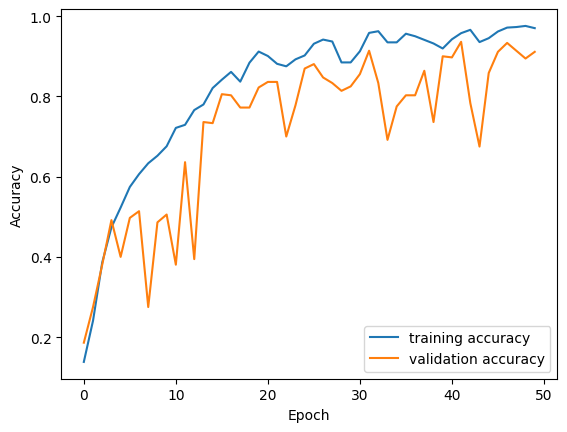

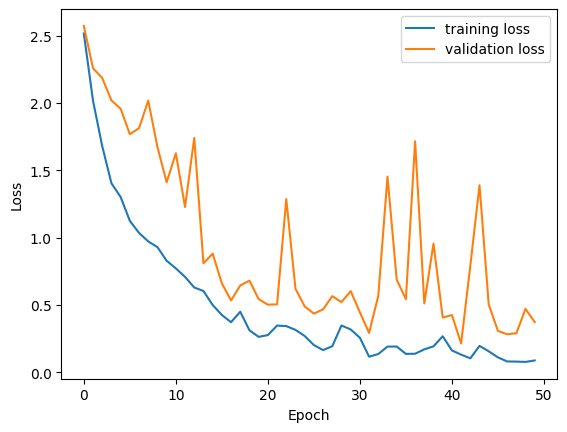

In [ ]:
plt.plot(model.history.history['categorical_accuracy'], label="training accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], label="validation accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model.history.history["loss"], label="training loss")
plt.plot(model.history.history["val_loss"], label="validation loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.save('PSL_15C_45F_64B_20T_.h5')
# del model, X_train, X_test, y_train, y_test

In [ ]:
# accuracy test

yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

12/12 [==============================] - 1s 20ms/step


array([[[333,   0],
        [ 25,   2]],

       [[333,   2],
        [  9,  16]],

       [[334,   1],
        [  3,  22]],

       [[318,  15],
        [  8,  19]],

       [[317,  11],
        [  0,  32]],

       [[333,   6],
        [ 17,   4]],

       [[333,   0],
        [ 18,   9]],

       [[331,   5],
        [  1,  23]],

       [[308,  32],
        [  0,  20]],

       [[329,   0],
        [ 25,   6]],

       [[314,  28],
        [  0,  18]],

       [[341,   1],
        [ 14,   4]],

       [[304,  36],
        [  4,  16]],

       [[336,   0],
        [  8,  16]],

       [[331,   8],
        [ 13,   8]]])

In [ ]:
accuracy_score(ytrue, yhat)

0.5972222222222222